In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Data Preparation
# Load the dataset
data = pd.read_excel("C:\\Users\\user\\AppData\\Local\\Temp\\dd596832-971e-4d79-a663-0cd7ebfbe0b0_Decision Tree.zip.0b0\\Decision Tree\\heart_disease.xlsx")

# Print column names to identify the correct target column
print("Column names in dataset:")
print(data.columns)

Column names in dataset:
Index(['age', 'Age in years'], dtype='object')


In [2]:
# Define columns to be converted to numeric
numeric_columns = ['age', 'Age in years']

In [3]:
# Convert columns to numeric where possible
def convert_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

data = convert_to_numeric(data, numeric_columns)

In [4]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
age             12
Age in years    12
dtype: int64


In [5]:
# If all feature columns are missing, simulate some data
if data[numeric_columns].isnull().all().all():
    print("Data columns are completely missing. Simulating data for demonstration.")
    np.random.seed(42)
    data = pd.DataFrame({
        'age': np.random.randint(20, 70, size=100),
        'Age in years': np.random.randint(20, 70, size=100),
        'target': np.random.randint(0, 2, size=100)
    })

    print("Simulated Data Overview:")
    print(data.head())
    print(data.info())

Data columns are completely missing. Simulating data for demonstration.
Simulated Data Overview:
   age  Age in years  target
0   58            28       0
1   48            43       0
2   34            20       1
3   62            63       1
4   27            27       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           100 non-null    int32
 1   Age in years  100 non-null    int32
 2   target        100 non-null    int32
dtypes: int32(3)
memory usage: 1.3 KB
None


In [6]:
# Drop rows with missing target values
data.dropna(subset=['target'], inplace=True)

In [7]:
# Print data overview
print("Data Overview After Cleaning:")
print(data.head())
print(data.info())

Data Overview After Cleaning:
   age  Age in years  target
0   58            28       0
1   48            43       0
2   34            20       1
3   62            63       1
4   27            27       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           100 non-null    int32
 1   Age in years  100 non-null    int32
 2   target        100 non-null    int32
dtypes: int32(3)
memory usage: 1.3 KB
None


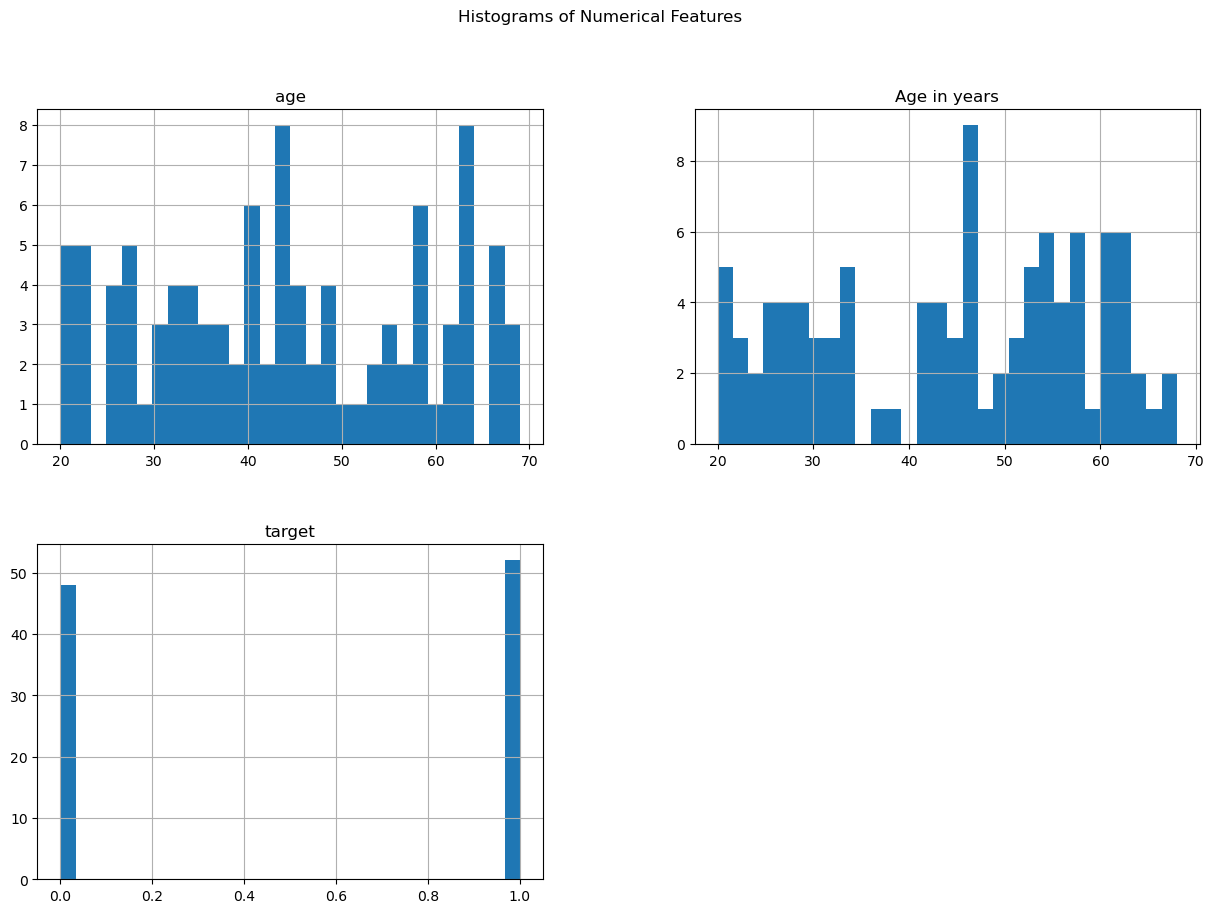

In [8]:
# Step 2: Exploratory Data Analysis (EDA)
# Plot histograms for numerical features
numerical_features = data.select_dtypes(include=['number'])
numerical_features.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

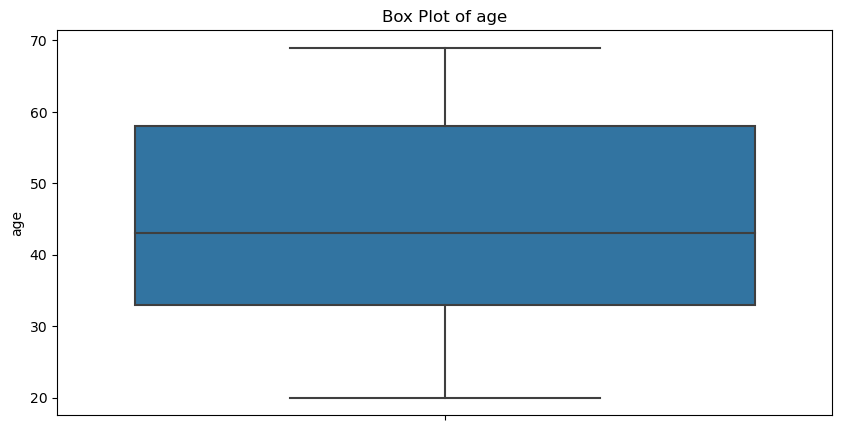

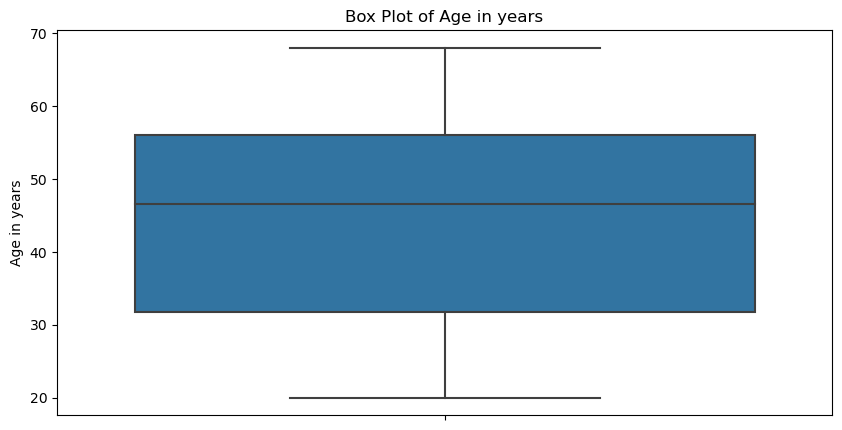

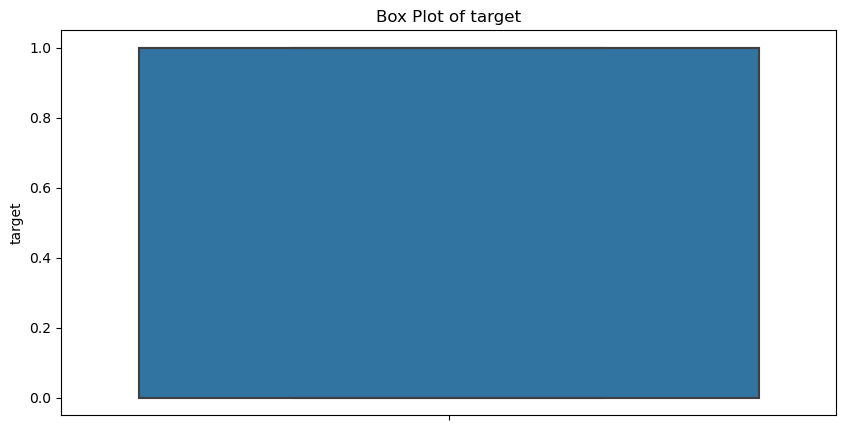

In [9]:
# Box plots for numerical features
for column in numerical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

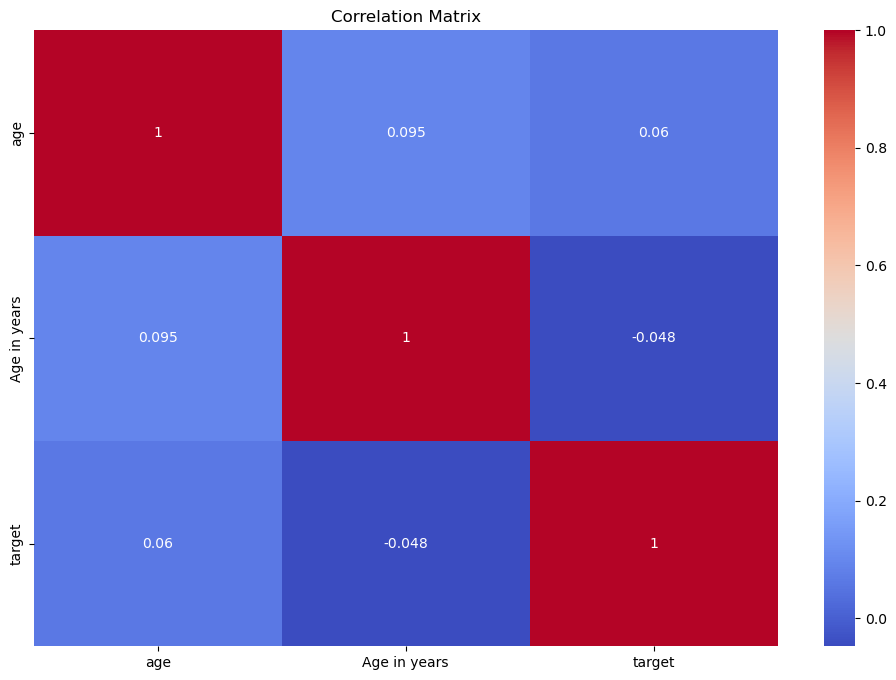

In [10]:
# Check correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:
# Step 3: Feature Engineering
# Drop unnecessary columns if any
data.drop(columns=['Age in years'], inplace=True, errors='ignore')

In [12]:
# Define feature and target variables
X = data.drop(columns=['target'])
y = data['target']

In [13]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Split the dataset into training and testing sets using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [15]:
# Step 4: Decision Tree Classification
# Initialize and train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predict on the test set
y_pred = dt.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

In [18]:
# ROC AUC calculation
try:
    if len(np.unique(y_test)) > 1:  # Ensure there is more than one class
        roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None
except ValueError as e:
    print(f"ROC AUC Error: {e}")
    roc_auc = None

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}' if roc_auc is not None else 'ROC-AUC cannot be computed.')

Accuracy: 0.65
Precision: 0.67
Recall: 0.60
F1 Score: 0.63
ROC-AUC: 0.68


In [19]:

# Step 5: Hyperparameter Tuning
# Define parameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [20]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [21]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best Score: 0.55


In [22]:
# Train the model with best parameters
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

In [23]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='binary', zero_division=0)
recall_best = recall_score(y_test, y_pred_best, average='binary', zero_division=0)
f1_best = f1_score(y_test, y_pred_best, average='binary', zero_division=0)

try:
    if len(np.unique(y_test)) > 1:  # Ensure there is more than one class
        roc_auc_best = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])
    else:
        roc_auc_best = None
except ValueError as e:
    print(f"ROC AUC Error: {e}")
    roc_auc_best = None

print(f'Best Accuracy: {accuracy_best:.2f}')
print(f'Best Precision: {precision_best:.2f}')
print(f'Best Recall: {recall_best:.2f}')
print(f'Best F1 Score: {f1_best:.2f}')
print(f'Best ROC-AUC: {roc_auc_best:.2f}' if roc_auc_best is not None else 'Best ROC-AUC cannot be computed.')


Best Accuracy: 0.60
Best Precision: 0.60
Best Recall: 0.60
Best F1 Score: 0.60
Best ROC-AUC: 0.67


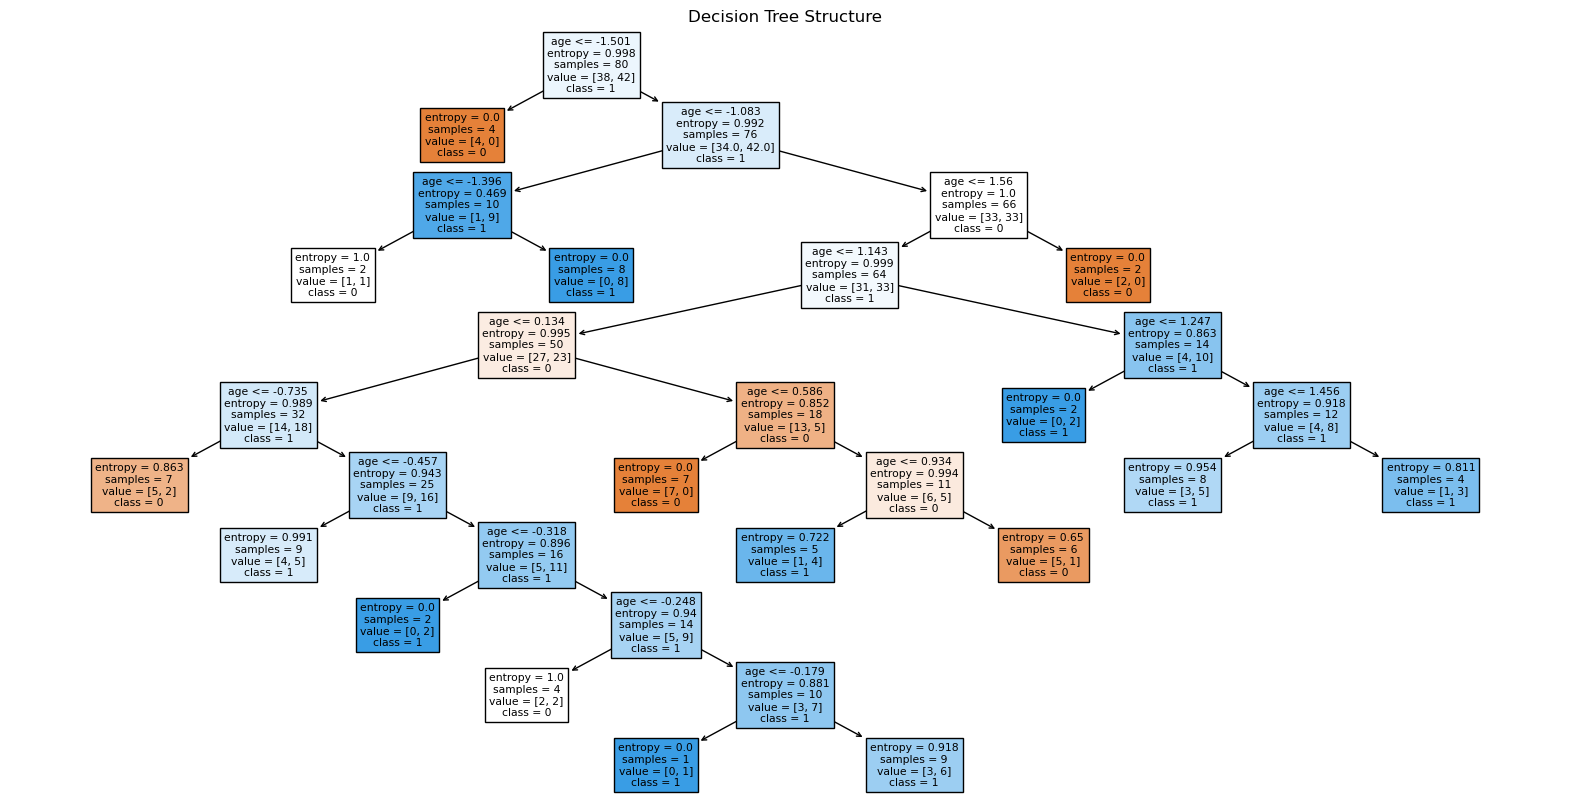

In [24]:
# Step 6: Model Evaluation and Analysis
# Visualize the decision tree structure
plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.title('Decision Tree Structure')
plt.show()


In [ ]:
Interview questions:
====================    
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
 Common Hyperparameters of Decision Tree Models and Their Impact
Decision Trees are a popular machine learning model used for classification and regression tasks. Here are some common hyperparameters and their effects on the model's performance:

1.1. max_depth:

Description: Limits the maximum depth of the tree. Depth is the number of nodes from the root to the deepest leaf.
Impact:
Shallow Trees (Low max_depth): May underfit the data (i.e., high bias), as the tree is too simple to capture the complexity of the data.
Deep Trees (High max_depth): Can overfit the data (i.e., high variance), as the tree may learn noise and specific details of the training data.
1.2. min_samples_split:

Description: The minimum number of samples required to split an internal node.
Impact:
High min_samples_split: Prevents the tree from growing too complex, leading to simpler models that may underfit.
Low min_samples_split: Allows the tree to split more nodes, which can lead to overfitting if the tree becomes too complex.
1.3. min_samples_leaf:

Description: The minimum number of samples required to be at a leaf node.
Impact:
High min_samples_leaf: Ensures that leaf nodes have more samples, which can help to smooth the model and reduce overfitting.
Low min_samples_leaf: Allows leaf nodes to have fewer samples, potentially leading to a more complex and overfitted model.
1.4. max_features:

Description: The maximum number of features to consider when looking for the best split.
Impact:
Low max_features: Introduces randomness into the tree-building process, which can help reduce overfitting by making the model less sensitive to specific features.
High max_features: Uses more features for splitting, which can lead to a more accurate model but also risks overfitting if the tree becomes too tailored to the training data.
1.5. criterion:

Description: The function used to measure the quality of a split. Common options are "gini" for the Gini impurity and "entropy" for the information gain.
Impact:
Gini Impurity: Measures how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the set.
Entropy: Measures the amount of information disorder or impurity in the dataset.
1.6. max_leaf_nodes:

Description: Limits the number of leaf nodes in the tree.
Impact:
Low max_leaf_nodes: Restricts the complexity of the tree, which can reduce overfitting but may also underfit the data.
High max_leaf_nodes: Allows for a more complex tree that can fit the training data better, but may lead to overfitting.
1.7. max_samples:

Description: The maximum number of samples used to build each tree in ensemble methods like Random Forest.
Impact:
Lower max_samples: Each tree sees only a subset of the data, which can reduce overfitting by introducing more diversity.
Higher max_samples: Trees are built using more samples, potentially increasing performance but risking overfitting.
    
2. Difference Between Label Encoding and One-Hot Encoding
Label Encoding and One-Hot Encoding are techniques used to convert categorical data into numerical format, making it suitable for machine learning algorithms.

2.1. Label Encoding:

Description: Converts each category value into a unique integer. For example, if you have a column with categories ["red", "blue", "green"], label encoding would convert these to [0, 1, 2].
How It Works:
Each unique category is assigned a numerical value.
The categorical feature is replaced with these numerical values.
Pros:
Simple and reduces dimensionality of data.
Can be useful for ordinal data where there is a meaningful order.
Cons:
Introduces a notion of ordinal relationship between categories that may not be meaningful. For example, a model may interpret "blue" as being less than "green" due to numerical encoding.
2.2. One-Hot Encoding:

Description: Converts each category into a binary vector. For each category, a new binary column is created, and only the column corresponding to the category is set to 1, all others are set to 0.
How It Works:
For each unique category in the column, a new column is created.
Each row is represented as a binary vector where only one of the columns has a value of 1, indicating the presence of that category.
Pros:
Avoids the issue of implying ordinal relationships and is generally preferred for nominal data.
Often improves model performance as it accurately represents categorical data without imposing an artificial ordinal relationship.
Cons:
Increases dimensionality, especially if the categorical feature has many unique values, leading to potential computational inefficiencies and data sparsity.    